<img src="https://hips.hearstapps.com/hmg-prod/images/close-up-of-speedometer-and-gas-gauge-royalty-free-image-1585163706.jpg" width="800"/>

# MPG

DataSet con el rendimiento de los vehículos en términos de millas por galón (miles per gallon, MPG). Este archivo contiene información sobre diferentes características de los automóviles.

## Librerías

In [2]:
# Tratamiento de datos
import itertools
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy

# Módulo Interno
from utils import create_summary_table, descriptive_statistics, plot_variable_distribution, grafico_combinaciones

## Carga de Datos

In [3]:
mpg = pd.read_csv('mpg.csv')

## Primera Exploración

In [4]:
df = mpg.copy()

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
df.shape

(398, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

No se observan missing

In [10]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


Se puede observar que los datos están compuestos por 398 filas y 9 columnas, las cuales son: 

|Variable|Descripción|
|---|---|
|mpg| Millas por galón, que indica la eficiencia del combustible del vehículo.|
|cylinders| Número de cilindros en el motor del vehículo.|
|displacement| Desplazamiento del motor en pulgadas cúbicas.|
|horsepower| Potencia del motor medida en caballos de fuerza.|
|weight| Peso del vehículo en libras.|
|acceleration| Tiempo que le toma al vehículo acelerar de 0 a 60 millas por hora.|
|model_year| Año del modelo del vehículo.|
|origin| Origen del vehículo (codificado como 1 para América, 2 para Europa y 3 para Asia).|
|name| Nombre del vehículo o modelo específico.|

## Análisis Inicial

In [11]:
create_summary_table(df)

,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
mpg,float64,129,32.412060,0,0.0,Numerica Continua
cylinders,int64,5,1.256281,0,0.0,Numerica Discreta
displacement,float64,82,20.603015,0,0.0,Numerica Continua
horsepower,object,94,23.618090,0,0.0,Categorica Nominal
weight,int64,351,88.190955,0,0.0,Numerica Continua
acceleration,float64,95,23.869347,0,0.0,Numerica Continua
model_year,int64,13,3.266332,0,0.0,Numerica Discreta
origin,int64,3,0.753769,0,0.0,Numerica Discreta
name,object,305,76.633166,0,0.0,Categorica Nominal


Existen 4 columnas numéricas continuas, 3 numéricas discretas, y dos categóricas nominales, de las cuales no tiene mucho sentido que horsepower sea nominal ya que debería ser discreta con una alta cardinalidad y model_year debería ser categórica ordinal.

In [12]:
numericas, categoricas = descriptive_statistics(df)

In [13]:
numericas

,count,mean,std,min,25%,50%,75%,max,median,mode,iqr,range,variance,std_dev,skewness,kurtosis,missing,missing_percent
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6,23.0,13.0,11.50,37.6,61.089611,7.815984,0.457066,-0.510781,0,0.0
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0,4.0,4.0,4.00,5.0,2.893415,1.701004,0.526922,-1.376662,0,0.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0,148.5,97.0,157.75,387.0,10872.199152,104.269838,0.719645,-0.746597,0,0.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0,2803.5,1985.0,1384.25,3527.0,717140.990526,846.841774,0.531063,-0.785529,0,0.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8,15.5,14.5,3.35,16.8,7.604848,2.757689,0.278777,0.419497,0,0.0
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0,76.0,73.0,6.00,12.0,13.672443,3.697627,0.011535,-1.181232,0,0.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0,1.0,1.0,1.00,2.0,0.643292,0.802055,0.923776,-0.817597,0,0.0


En las variables numéricas podemos observar que solo aceleración tiene una distribución parecida a la normal mientras que model_year y origin deberían categorizarse como categóricas ordinal y nominal respectivamente

In [14]:
categoricas

,count,unique,top,freq,missing,missing_percent
horsepower,398,94,150,22,0,0.0
name,398,305,ford pinto,6,0,0.0


En las variables categóricas name tiene una alta cardinalidad lo que posiblemente no nos aporte mucha información a menos que la tratemos y como se menciona anteriormente horsepower debería ser numérica discreta.

Antes de realizar las graficas vamos a convertir correctamente las variables a los tipos correctos de datos

In [15]:
df['origin'] = df['origin'].astype('category')
df['model_year'] = df['model_year'].astype('category')

In [16]:
# df['horsepower'] = df['horsepower'].astype('int')

ValueError: invalid literal for int() with base 10: '?'

In [17]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [18]:
df['horsepower'] = df['horsepower'].astype('Int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    Int64   
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: Int64(1), category(2), float64(3), int64(2), object(1)
memory usage: 23.8+ KB


In [20]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Esta conversión genera unos missing que se trataran mas adelante

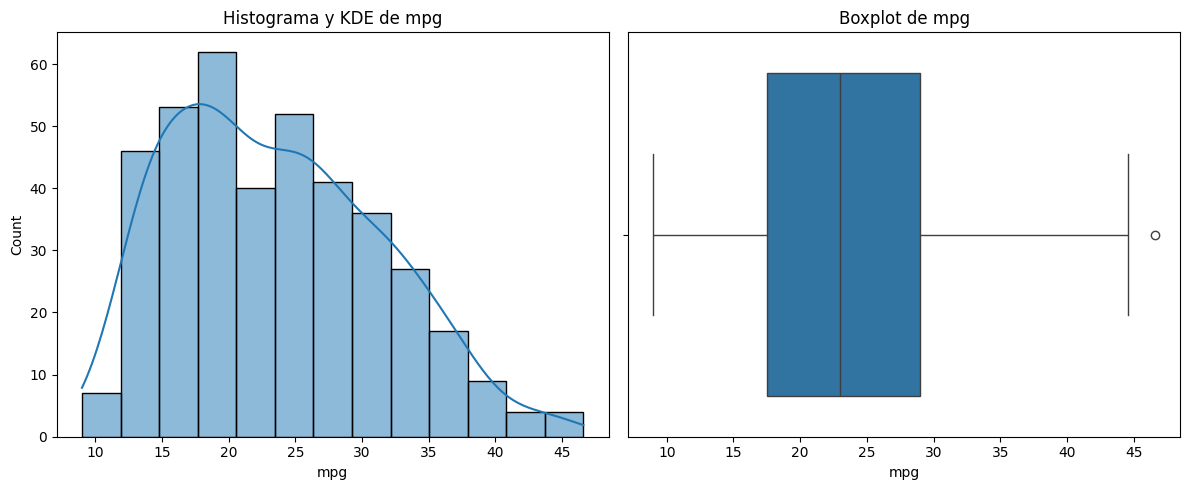

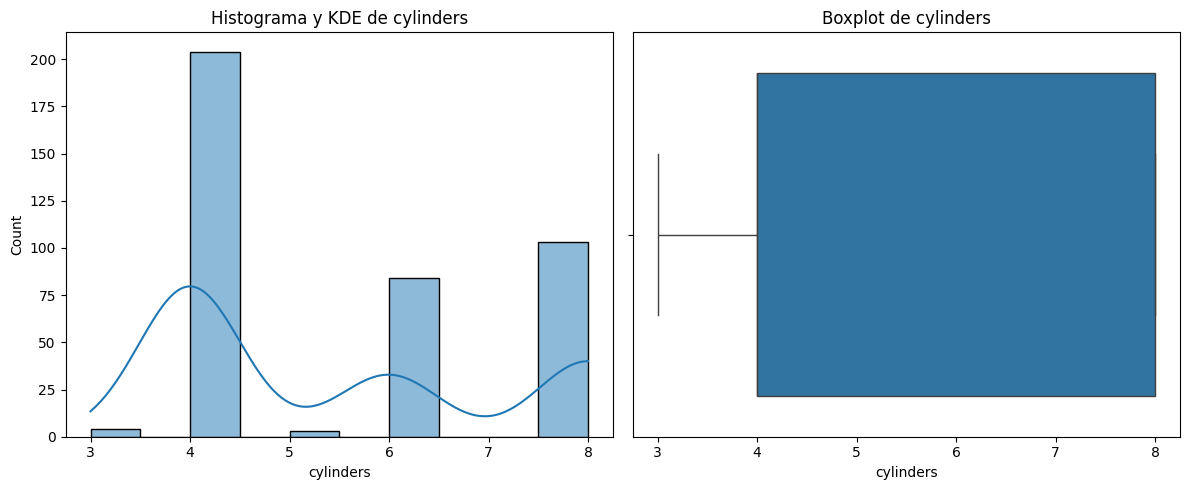

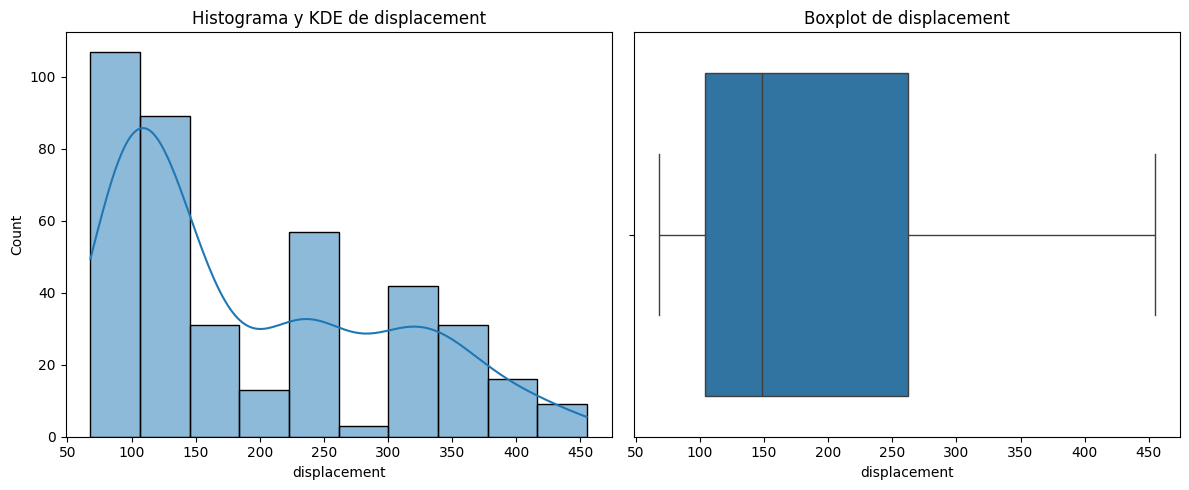

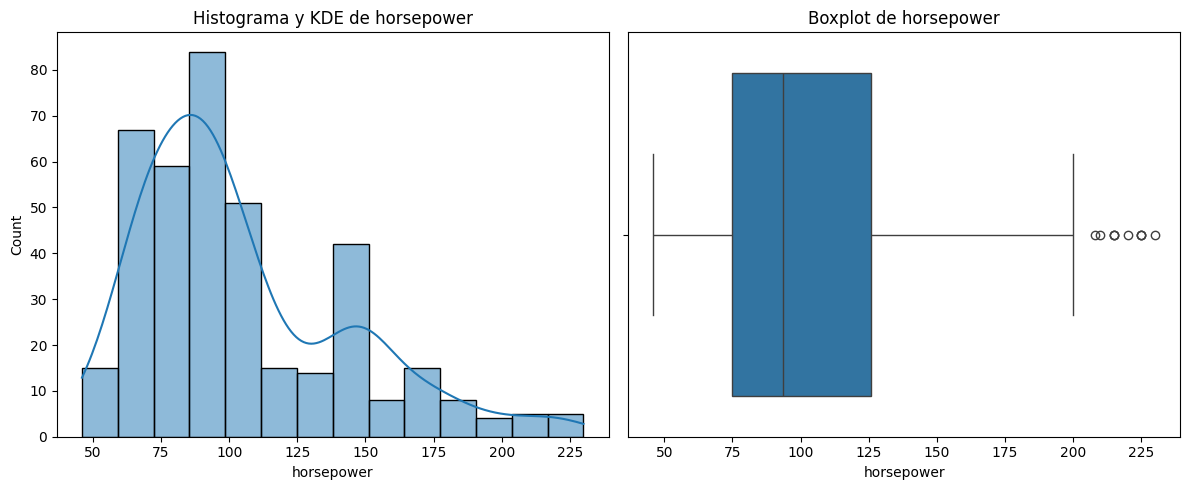

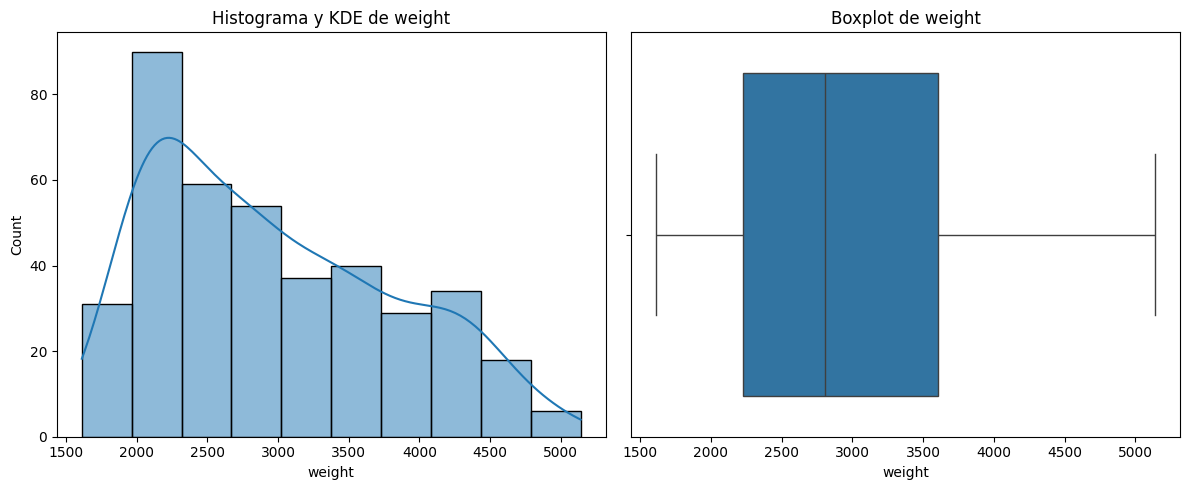

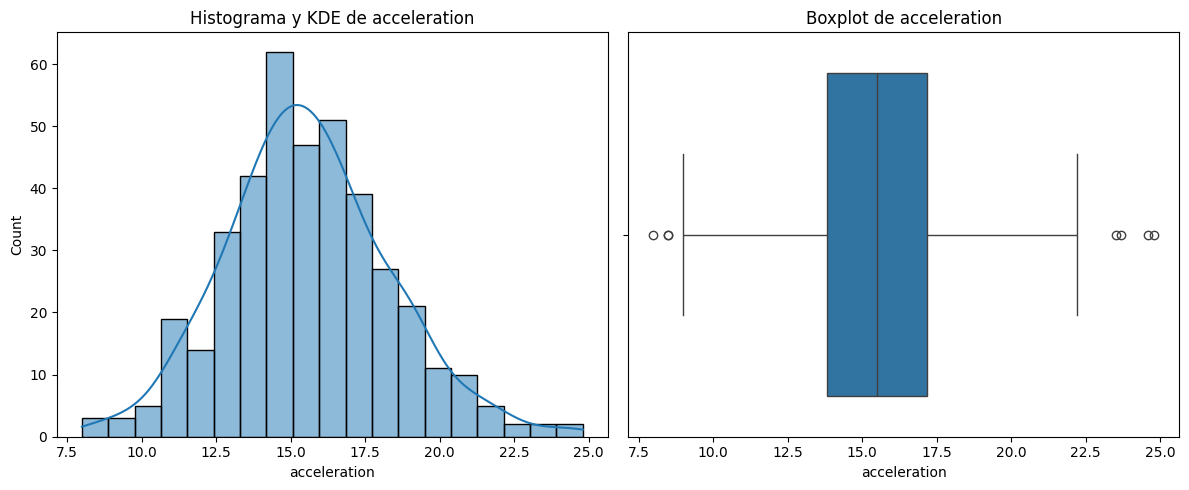

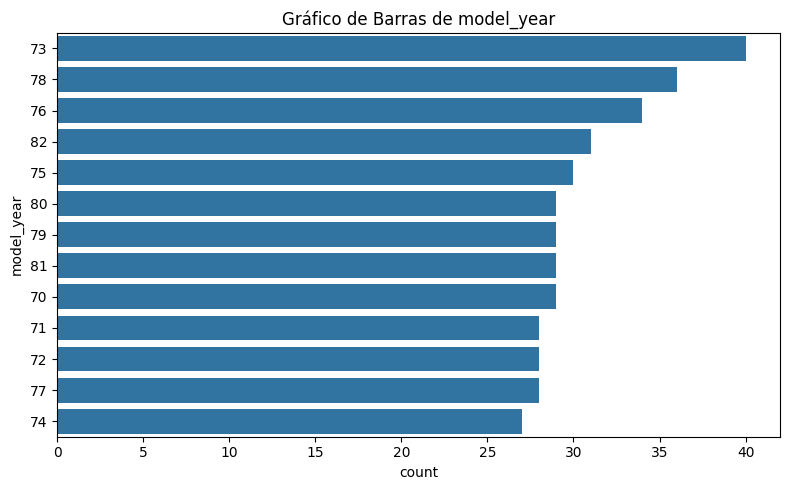

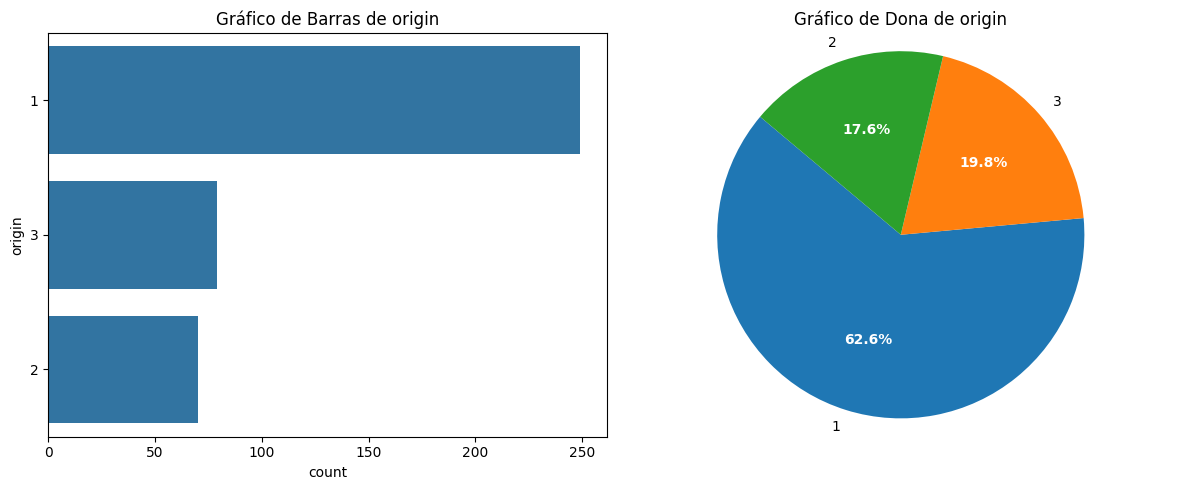

In [ ]:
plot_variable_distribution(df)

- Variable mpg:
    - Histograma y KDE de mpg:
        - El histograma muestra la distribución de millas por galón (mpg) de los autos en el dataset.
        - La mayoría de los autos tienen un mpg entre 15 y 30.
        - La curva KDE sugiere una distribución ligeramente sesgada a la derecha.
    - Boxplot de mpg:
        - El boxplot confirma que la mediana de mpg está alrededor de 23.
        - Hay un outlier por encima de 45 mpg.

- Variable cylinders:
    - Histograma y KDE de cylinders:
        - La mayoría de los autos tienen 4 cilindros, seguidos por 8 y luego 6 cilindros.
        - Hay pocos autos con 3 y 5 cilindros.
        - La curva KDE muestra múltiples picos, lo que sugiere que los cilindros tienen valores discretos específicos.
    - Boxplot de cylinders:
        - La mayoría de los autos tienen entre 4 y 8 cilindros.
        - No hay outliers significativos.

- Variable displacement:
    - Histograma y KDE de displacement:
        - La mayoría de los autos tienen una cilindrada (displacement) entre 100 y 200.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra varios picos, indicando grupos dentro del rango.
    - Boxplot de displacement:
        - La mediana está alrededor de 150.
        - Hay una amplia variación en la cilindrada, desde 50 hasta 450.

- Variable horsepower:
    - Histograma y KDE de horsepower:
        - La mayoría de los autos tienen entre 50 y 150 caballos de fuerza.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra un pico principal alrededor de 100.
    - Boxplot de horsepower:
        - La mediana está cerca de 100.
        - Hay varios outliers por encima de 200 caballos de fuerza.

- Variable weight:
    - Histograma y KDE de weight:
        - La mayoría de los autos pesan entre 2000 y 3500 libras.
        - La distribución tiene una cola larga hacia la derecha.
        - La curva KDE muestra un pico principal alrededor de 2500.
    - Boxplot de weight:
        - La mediana está cerca de 3000 libras.
        - Hay una amplia variación en el peso, desde 1500 hasta 5000 libras.

- Variable acceleration:
    - Histograma y KDE de acceleration:
        - La mayoría de los autos tienen una aceleración entre 10 y 20 segundos.
        - La distribución es aproximadamente simétrica.
        - La curva KDE muestra un pico principal alrededor de 15.
    - Boxplot de acceleration:
        - La mediana está cerca de 15.
        - Hay algunos outliers por debajo de 10 y por encima de 22.

- Variable model_year:
    - Gráfico de Barras de model_year:
        - Muestra la cantidad de autos por año de modelo.
        - El año 73 tiene la mayor cantidad de autos, seguido por el 78 y el 76.

- Variable origin:
    - Gráfico de Barras de origin:
        - Muestra la cantidad de autos por origen.
        - La mayoría de los autos son de origen 1 (posiblemente EE.UU.), seguido por origen 3 y 2.
        
    - Gráfico de Dona de origin:
        - Representa las proporciones de autos por origen.
        - Origen 1 es el dominante con el 62.6%, seguido de origen 3 con el 19.8% y origen 2 con el 17.6%.


## Limpieza

- Outliers: Las variables `mpg`, `horsepower` y `acceleration` presentan algunos outliers.
- Errores: La variable ``horsepower`` presentaba un error o una imputación no correcta (`?`) que fue modificada antes y reemplazada por NaNs.
- Missing: La variable `horsepower` tiene 6 NaNs que deben ser tratados.

In [ ]:
df1 = df.copy()
df1['horsepower'] = df1['horsepower'].fillna(0)

In [ ]:
df2 = df.copy()
print(df2['horsepower'].unique())
print('media', df2['horsepower'].mean())
print('mediana', df2['horsepower'].median())
print('mode', df2['horsepower'].mode()[0])
print('media 4c',df2[df2['cylinders']==4]['horsepower'].mean())
print('media 6c',df2[df2['cylinders']==6]['horsepower'].mean())
print('mediana 4c',df2[df2['cylinders']==4]['horsepower'].median())
print('mediana 6c',df2[df2['cylinders']==6]['horsepower'].median())
print('moda 4c',df2[df2['cylinders']==4]['horsepower'].mode()[0])
print('moda 6c',df2[df2['cylinders']==6]['horsepower'].mode()[0])
df2[df2['horsepower'].isnull()]

<IntegerArray>
[ 130,  165,  150,  140,  198,  220,  215,  225,  190,  170,  160,   95,   97,
   85,   88,   46,   87,   90,  113,  200,  210,  193, <NA>,  100,  105,  175,
  153,  180,  110,   72,   86,   70,   76,   65,   69,   60,   80,   54,  208,
  155,  112,   92,  145,  137,  158,  167,   94,  107,  230,   49,   75,   91,
  122,   67,   83,   78,   52,   61,   93,  148,  129,   96,   71,   98,  115,
   53,   81,   79,  120,  152,  102,  108,   68,   58,  149,   89,   63,   48,
   66,  139,  103,  125,  133,  138,  135,  142,   77,   62,  132,   84,   64,
   74,  116,   82]
Length: 94, dtype: Int64
media 104.46938775510205
mediana 93.5
mode 150
media 4c 78.28140703517587
media 6c 101.50602409638554
mediana 4c 78.0
mediana 6c 100.0
moda 4c 88
moda 6c 100


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,<NA>,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,<NA>,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,<NA>,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,<NA>,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,<NA>,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,<NA>,3035,20.5,82,1,amc concord dl


## Análisis Exploratorio

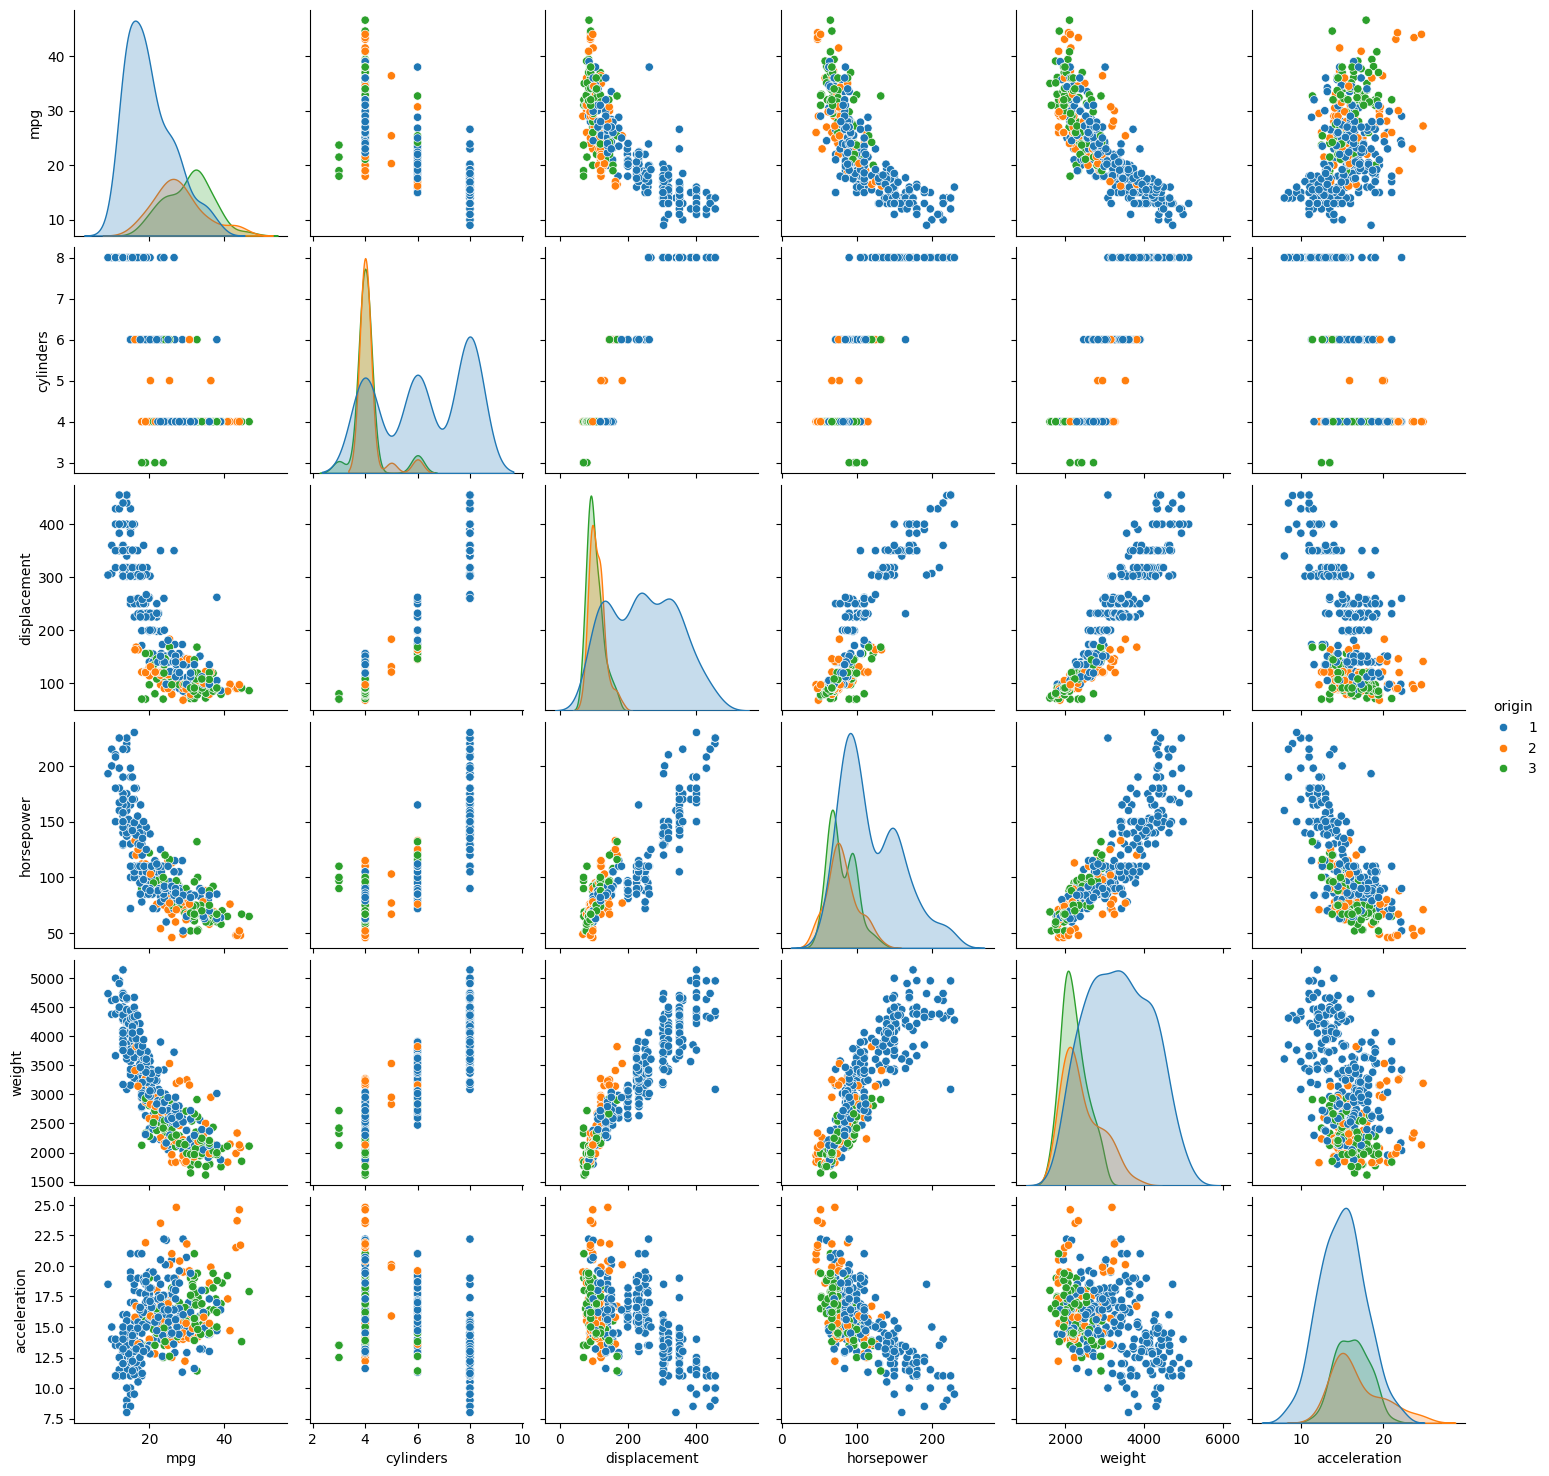

In [ ]:
sns.pairplot(df, hue='origin');

mpg: numerica_continua
cylinders: numerica_discreta
displacement: numerica_continua
horsepower: numerica_continua
weight: numerica_continua
acceleration: numerica_continua
model_year: categorica_nominal
origin: categorica_nominal


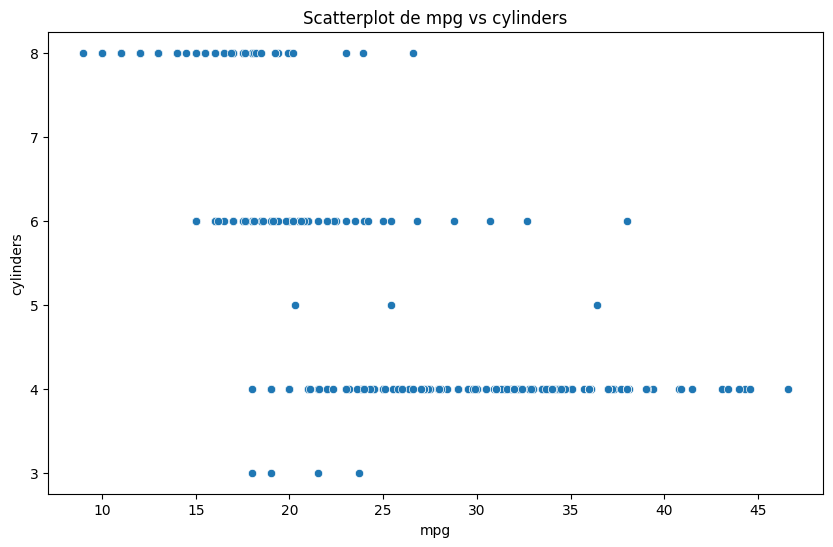

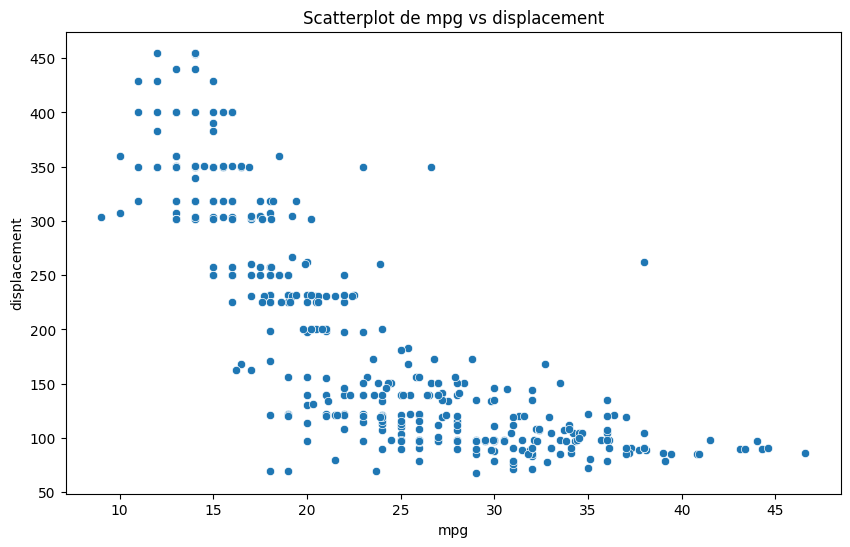

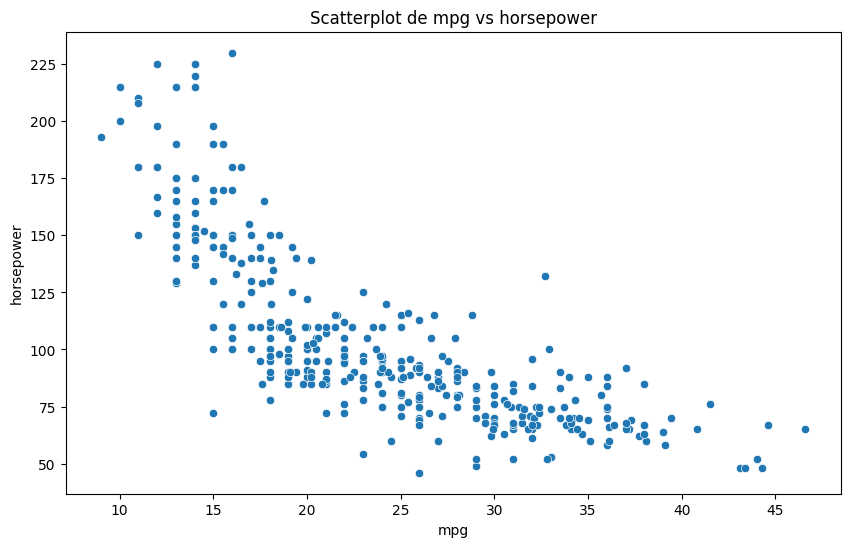

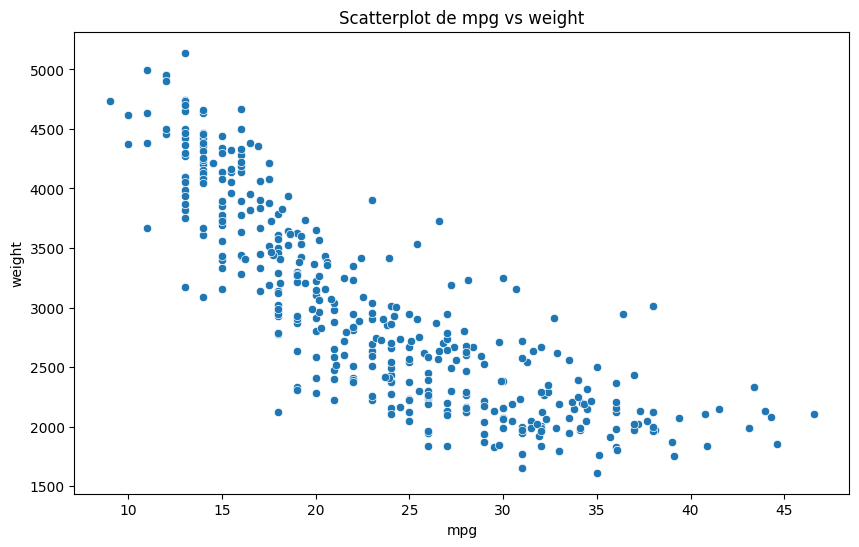

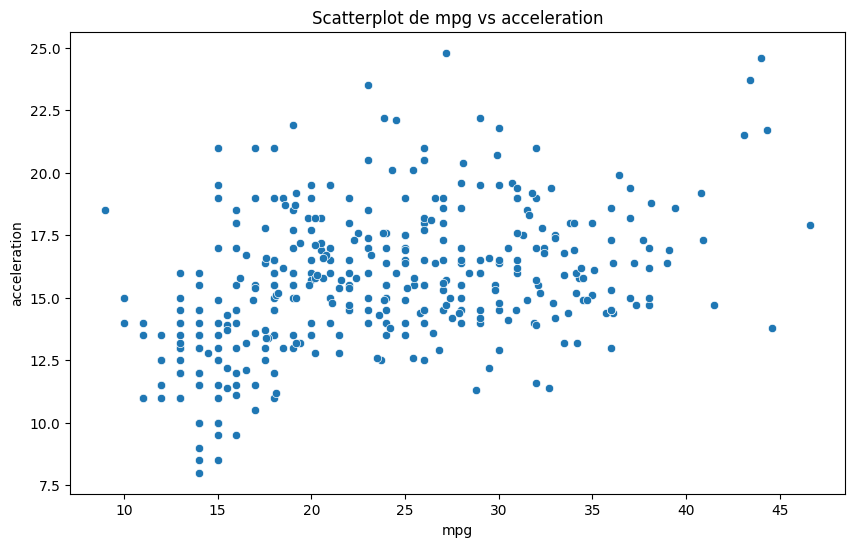

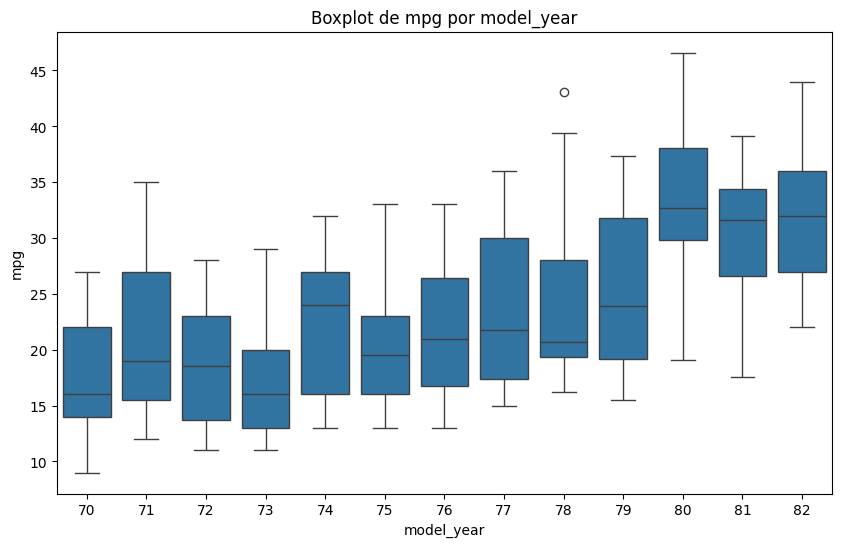

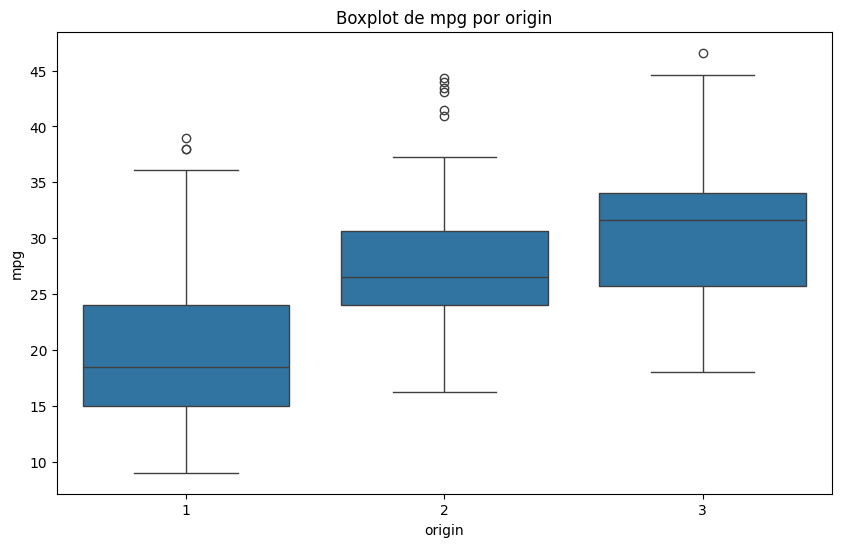

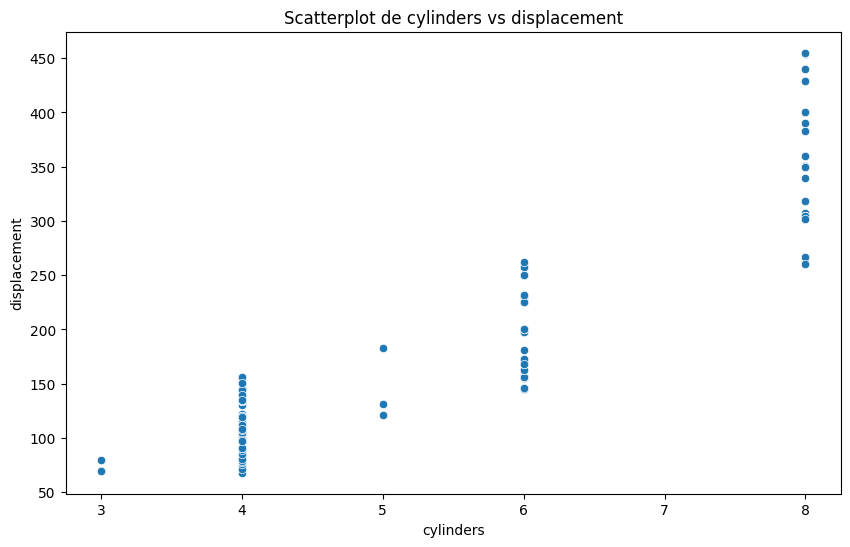

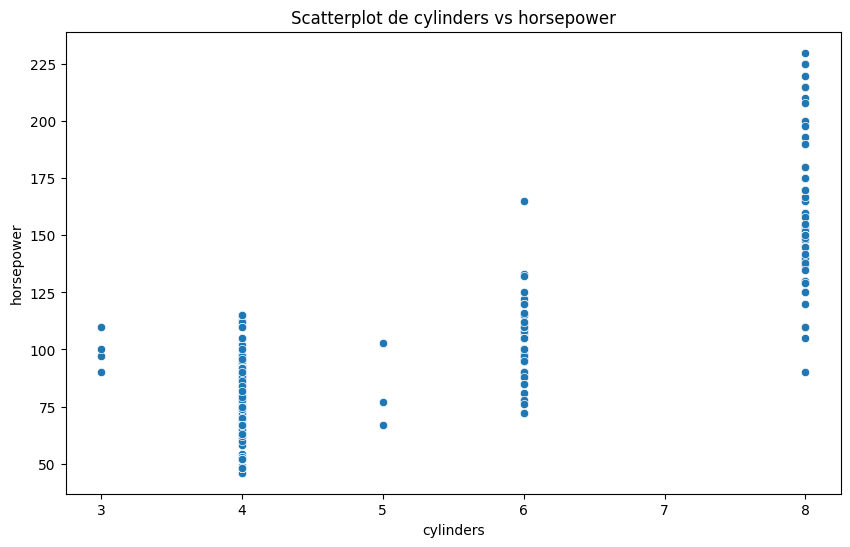

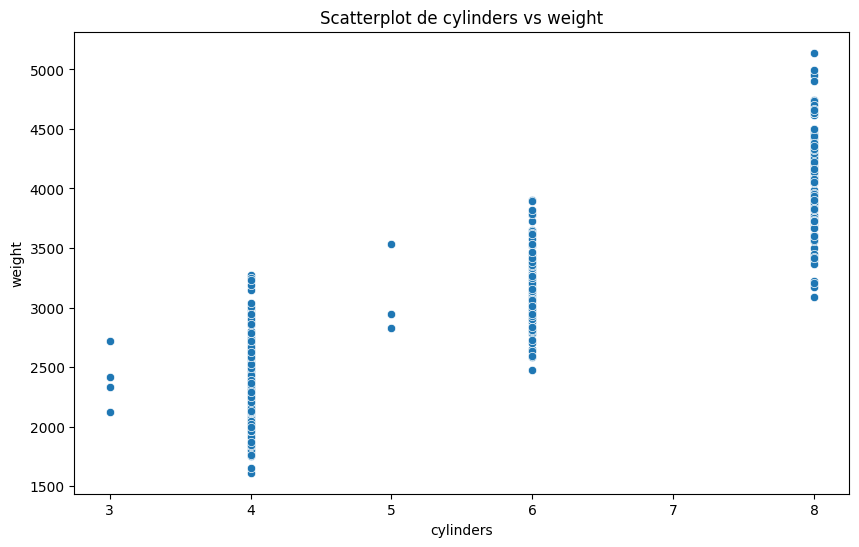

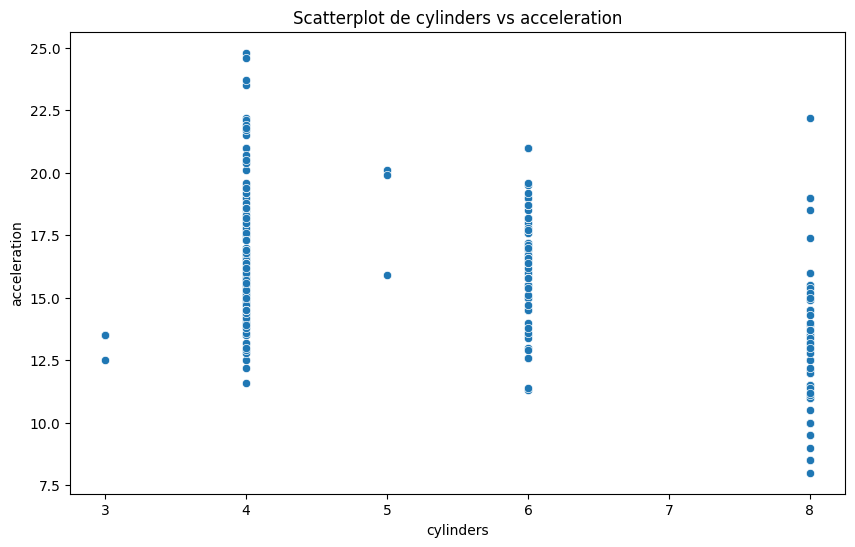

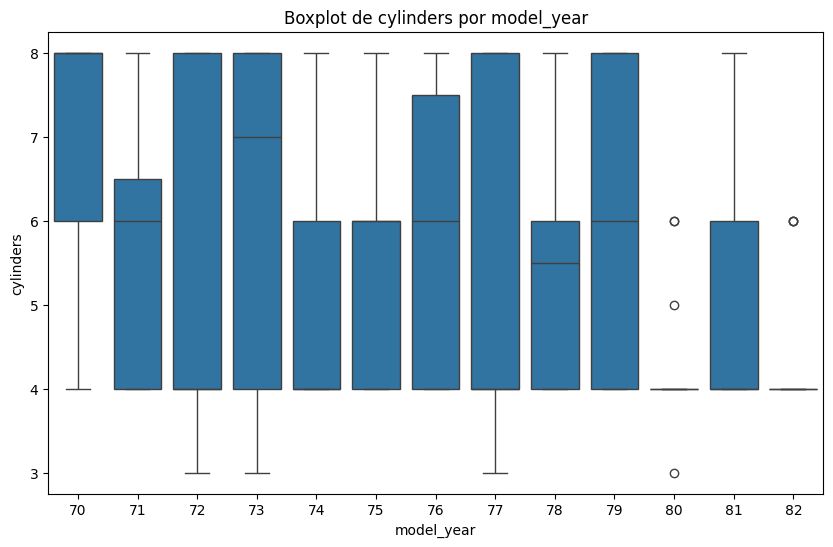

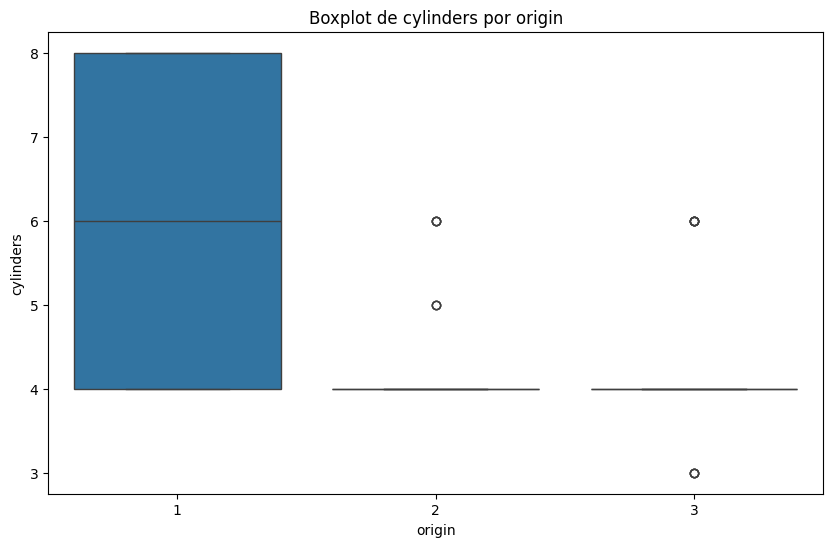

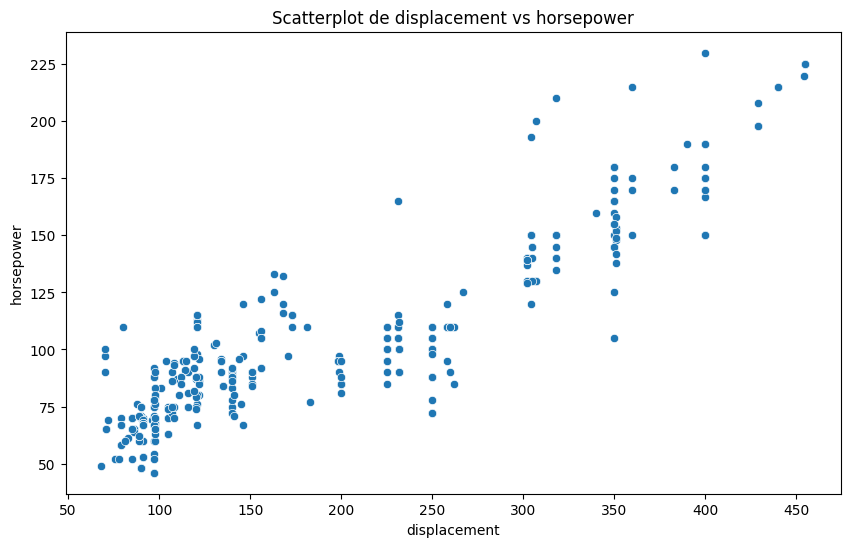

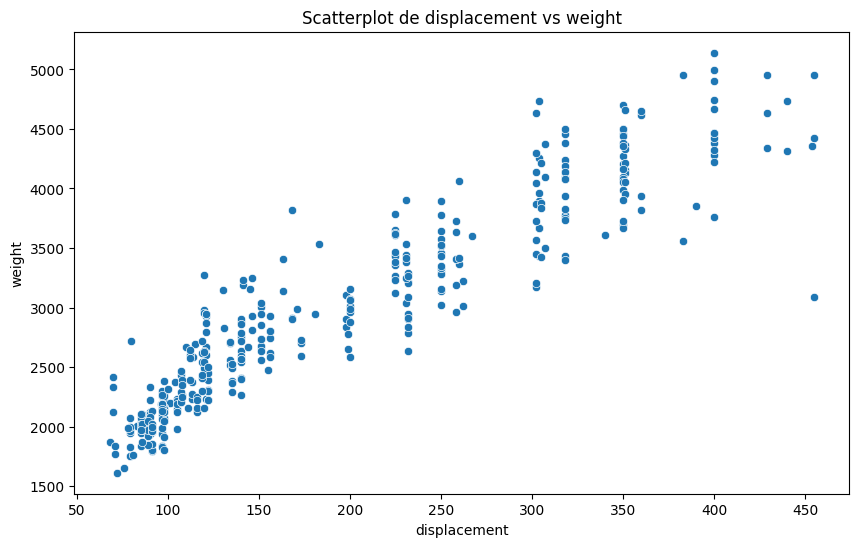

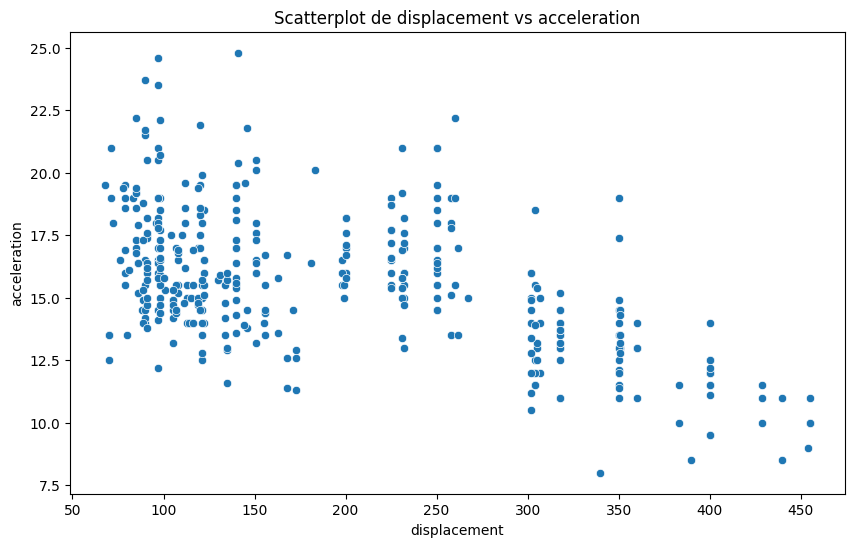

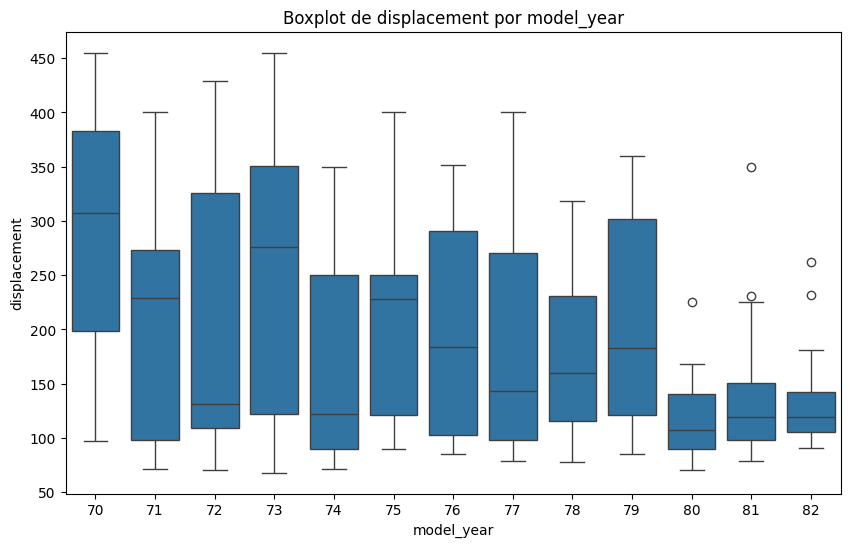

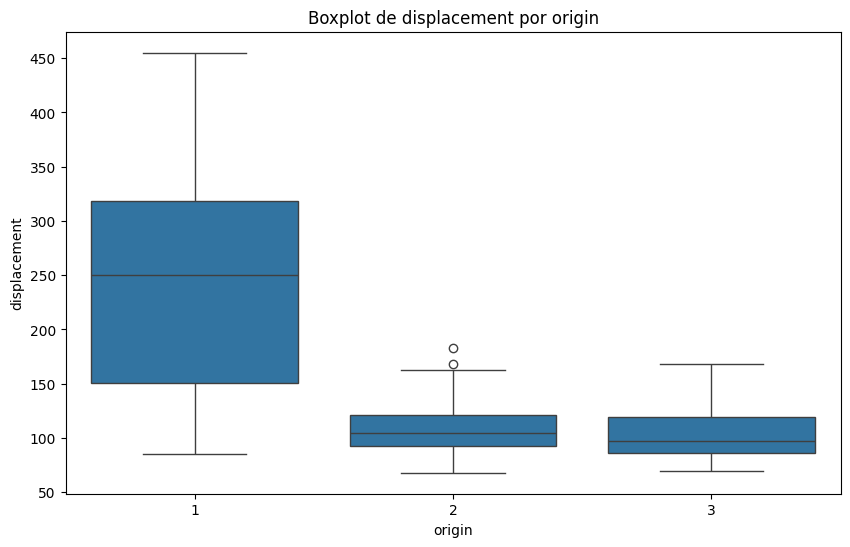

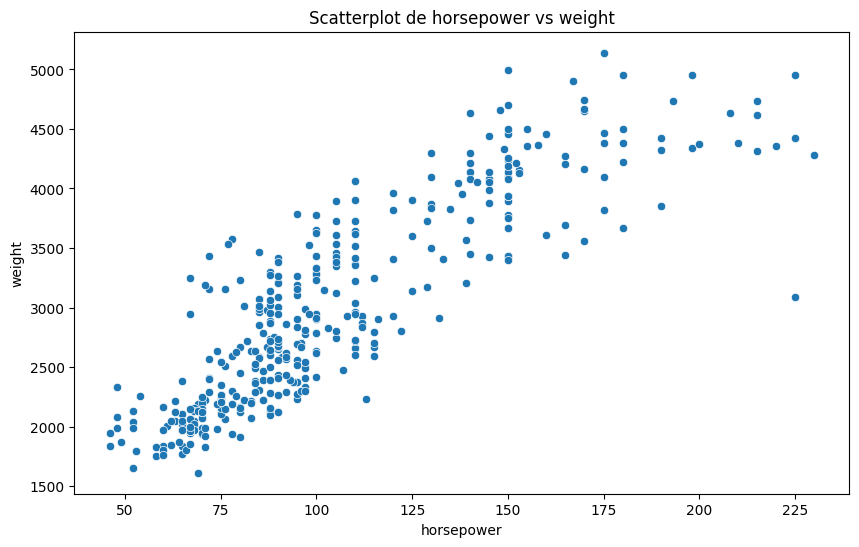

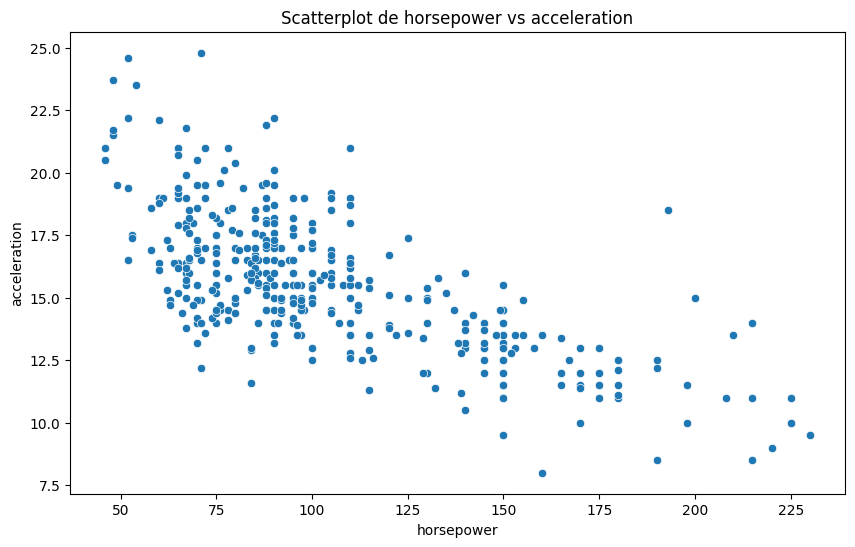

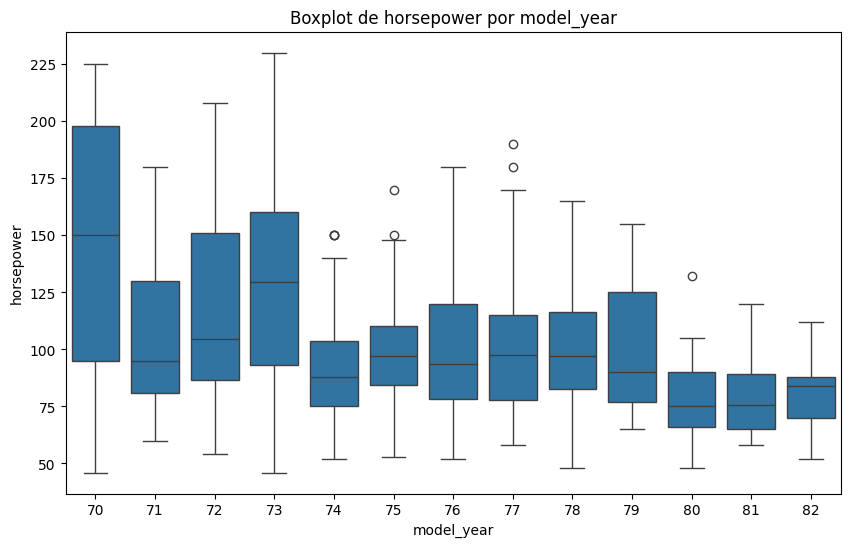

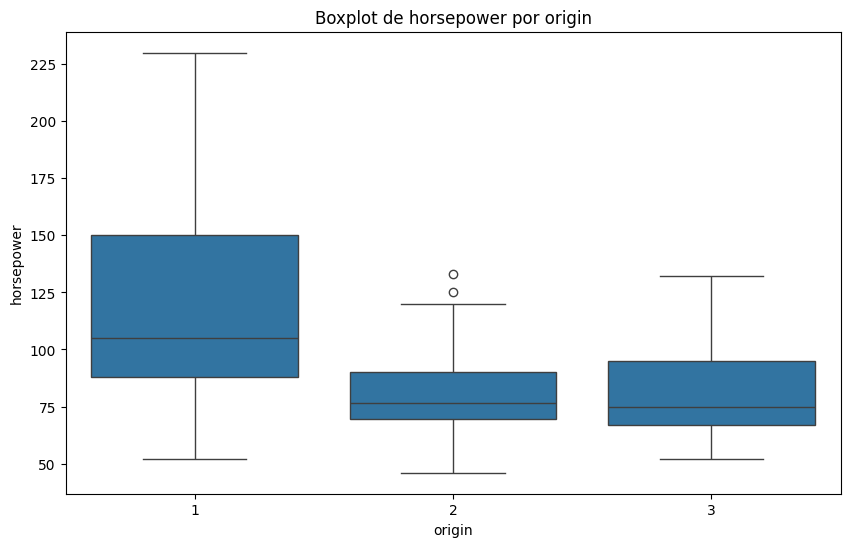

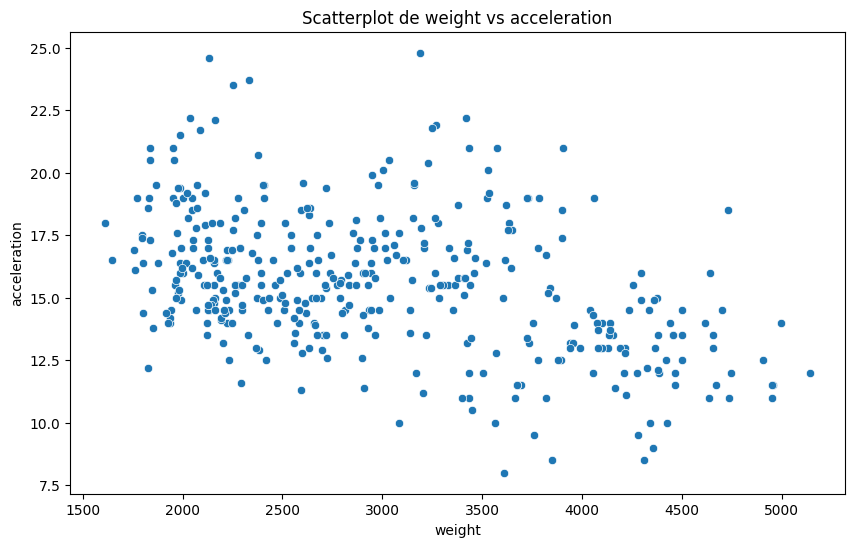

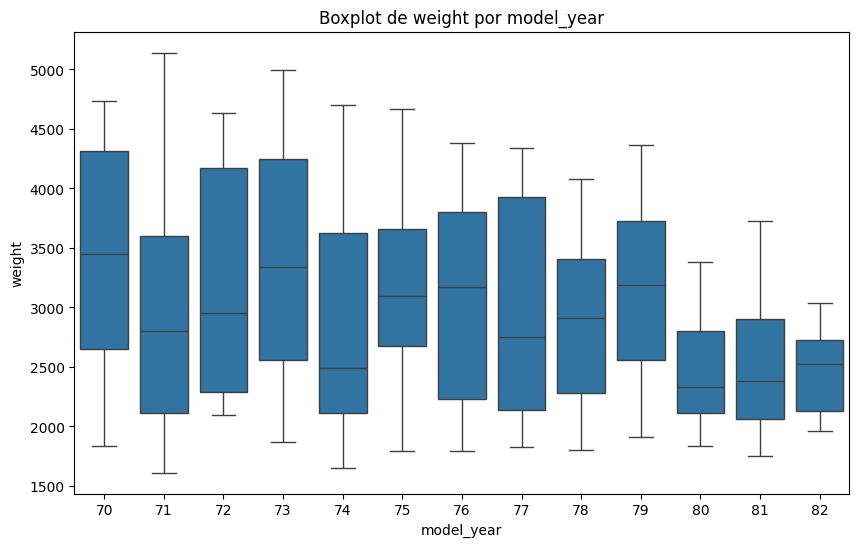

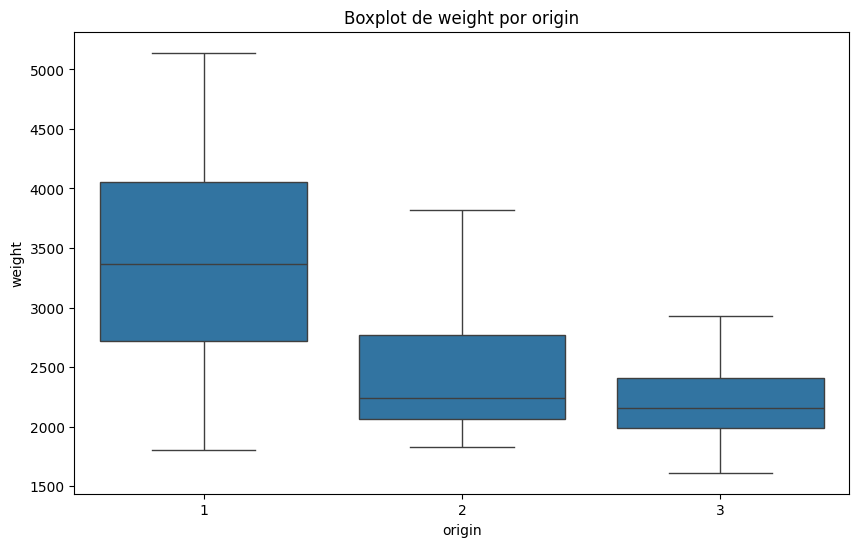

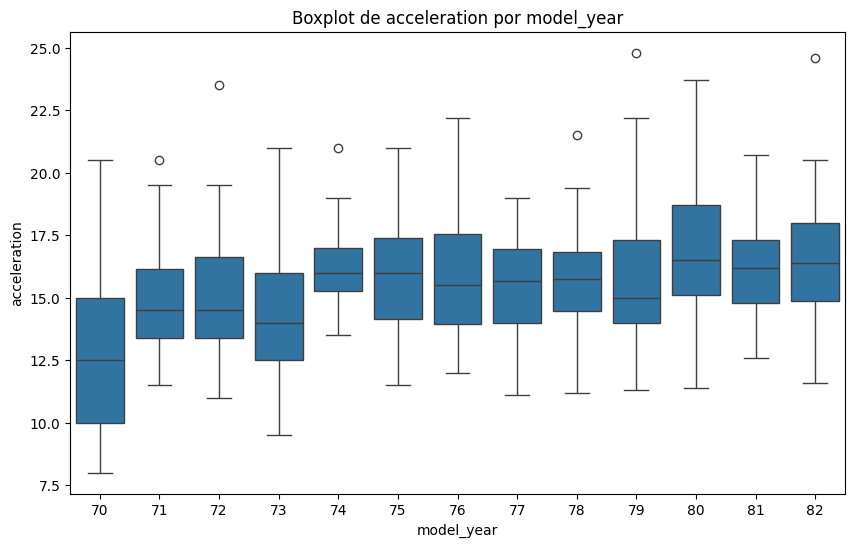

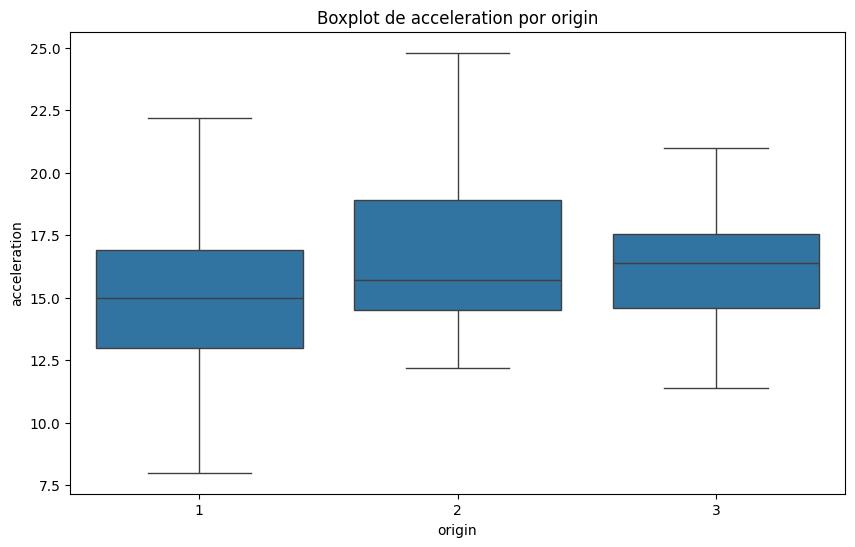

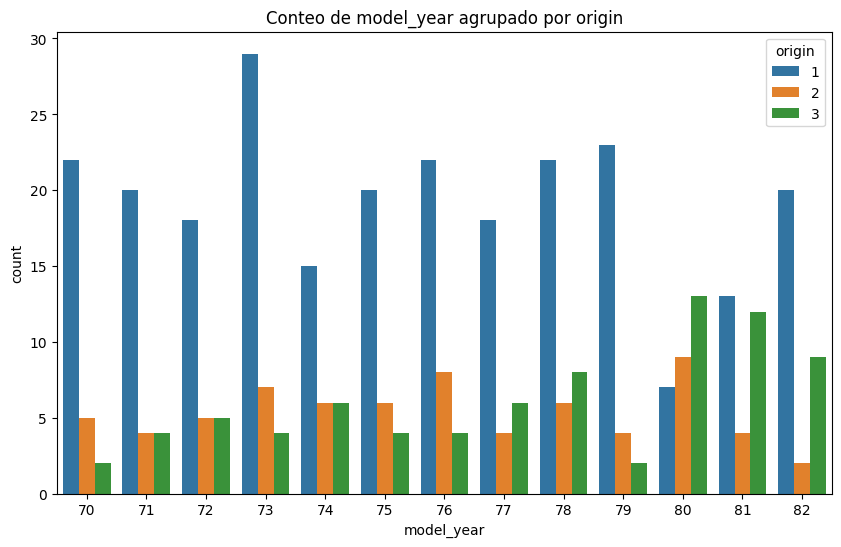

In [ ]:
grafico_combinaciones(df.drop(columns='name'), categoricas_nominales=['model_year','origin'])

Agrupa los datos por el número de cilindros y calcula el promedio de millas por galón (MPG) para cada grupo. ¿Qué relación encuentras entre el número de cilindros y el MPG promedio?

Crea un gráfico de dispersión que muestre la relación entre el peso del vehículo y el MPG. ¿Qué observaciones puedes hacer sobre esta relación?

Realiza una prueba t de dos muestras para comparar los promedios de MPG entre vehículos con 4 cilindros y vehículos con 6 cilindros. ¿Hay una diferencia estadísticamente significativa?

Utiliza una ANOVA para comparar los promedios de MPG entre los diferentes tipos de cilindros (4, 6 y 8 cilindros). ¿Existen diferencias significativas entre estos grupos?

Filtra los vehículos del dataset que fueron fabricados en los años ochenta y crea un gráfico de líneas que muestre cómo varió el MPG promedio a lo largo de esos años. ¿Qué tendencias observas?

Crea un gráfico de barras que muestre la cantidad de vehículos por cada fabricante. ¿Qué fabricante tiene más modelos en el dataset?

Filtra los vehículos con una cilindrada mayor a 200 y menores a 300. ¿Cuál es el promedio de MPG para este grupo? ¿Cómo se compara con el promedio general?

Agrupa los datos por el origen del vehículo (USA, Europe, Japan) y calcula el promedio de caballos de fuerza para cada grupo. ¿Qué diferencias observas entre los distintos orígenes?

Filtra los vehículos que tienen más de 6 cilindros y crea un histograma que muestre la distribución del MPG para estos vehículos. ¿Cómo se compara esta distribución con la de todos los vehículos del dataset?

Investiga la relación entre el año de fabricación y el peso del vehículo. ¿Han cambiado los pesos de los vehículos a lo largo del tiempo? Utiliza gráficos y análisis estadísticos para respaldar tu respuesta.

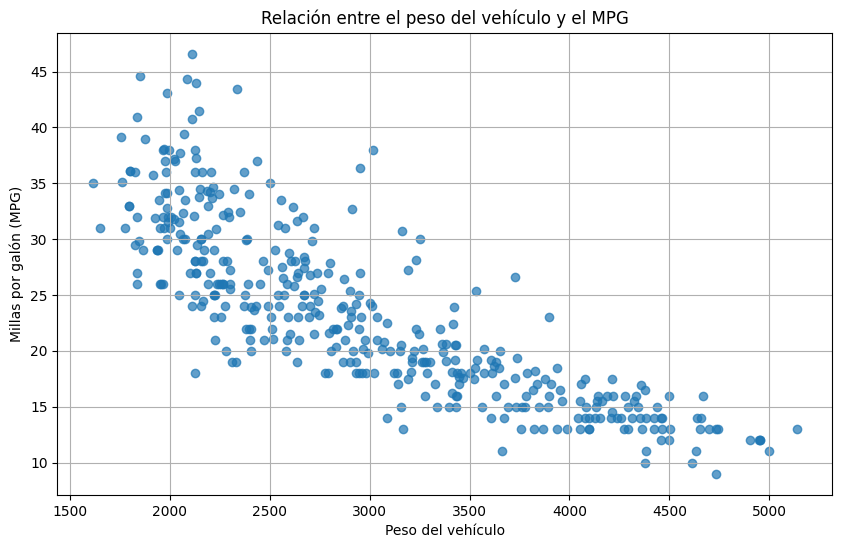

,cylinders,mpg
0,3,20.550000
1,4,29.286765
2,5,27.366667
3,6,19.985714
4,8,14.963107


In [22]:
mpg_by_cylinders = df.groupby('cylinders')['mpg'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.7)
plt.title('Relación entre el peso del vehículo y el MPG')
plt.xlabel('Peso del vehículo')
plt.ylabel('Millas por galón (MPG)')
plt.grid(True)
plt.show()

mpg_by_cylinders

Promedio de MPG por número de cilindros:

- 3 cilindros: 20.55 MPG
- 4 cilindros: 29.29 MPG
- 5 cilindros: 27.37 MPG
- 6 cilindros: 19.99 MPG
- 8 cilindros: 14.96 MPG

Relación: A medida que aumenta el número de cilindros, el promedio de millas por galón (MPG) tiende a disminuir. Los vehículos con 4 cilindros tienen el mayor MPG promedio, mientras que los vehículos con 8 cilindros tienen el menor.

La gráfica muestra una relación inversa entre el peso del vehículo y el MPG. A medida que el peso del vehículo aumenta, el MPG tiende a disminuir.

In [27]:
from scipy.stats import ttest_ind

mpg_4_cylinders = df[df['cylinders'] == 4]['mpg']
mpg_6_cylinders = df[df['cylinders'] == 6]['mpg']

t_stat, p_value = ttest_ind(mpg_4_cylinders, mpg_6_cylinders)

t_stat, p_value

(np.float64(13.718631345338444), np.float64(2.947920641313147e-33))

Interpretación: El valor p es extremadamente pequeño, mucho menor que el umbral común de 0.05. Esto indica que hay una diferencia estadísticamente significativa en los promedios de MPG entre vehículos con 4 cilindros y vehículos con 6 cilindros.

In [30]:
from scipy.stats import f_oneway

mpg_4 = df[df['cylinders'] == 4]['mpg']
mpg_6 = df[df['cylinders'] == 6]['mpg']
mpg_8 = df[df['cylinders'] == 8]['mpg']

f_stat, p_value_anova = f_oneway(mpg_4, mpg_6, mpg_8)

f_stat, p_value_anova

(np.float64(345.1208091080899), np.float64(7.698979219498918e-87))

Interpretación: El valor p es extremadamente pequeño, indicando que hay diferencias estadísticamente significativas en los promedios de MPG entre los grupos de vehículos con 4, 6 y 8 cilindros.

In [24]:
df['model_year'] = df['model_year'].astype('int')

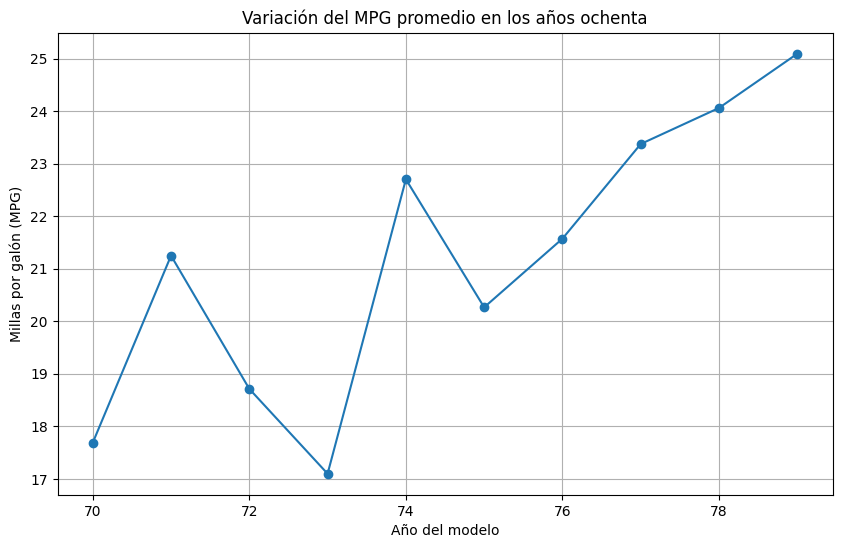

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704
5,75,20.266667
6,76,21.573529
7,77,23.375000
8,78,24.061111
9,79,25.093103


In [33]:
mpg_80s = df[(df['model_year'] >= 70) & (df['model_year'] <= 79)]

mpg_avg_80s = mpg_80s.groupby('model_year')['mpg'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mpg_avg_80s['model_year'], mpg_avg_80s['mpg'], marker='o')
plt.title('Variación del MPG promedio en los años ochenta')
plt.xlabel('Año del modelo')
plt.ylabel('Millas por galón (MPG)')
plt.grid(True)
plt.show()

mpg_avg_80s

El gráfico muestra cómo varió el MPG promedio en los años ochenta. Los datos disponibles indican los siguientes promedios:

- 1980: 33.70 MPG
- 1981: 30.33 MPG
- 1982: 31.71 MPG

Observaciones: Se observa una ligera disminución en el MPG promedio de 1980 a 1981, seguido de un ligero aumento en 1982. Sería útil tener datos adicionales para observar tendencias más claras a lo largo de toda la década

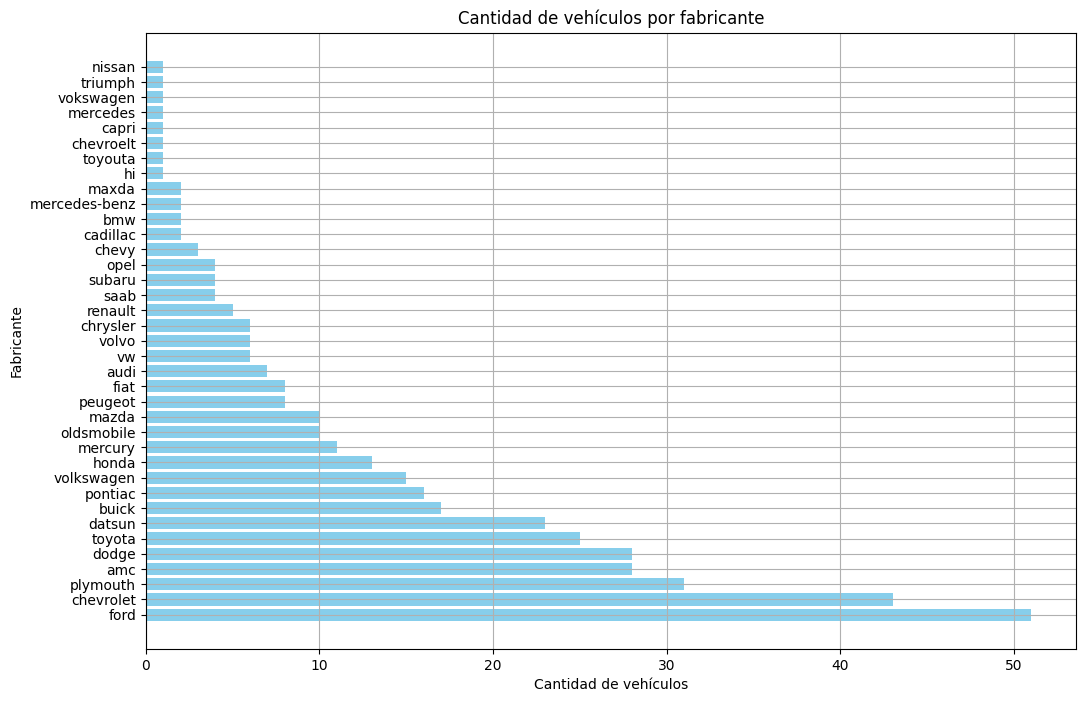

,manufacturer,count
0,ford,51
1,chevrolet,43
2,plymouth,31
3,amc,28
4,dodge,28
5,toyota,25
6,datsun,23
7,buick,17
8,pontiac,16
9,volkswagen,15


In [34]:
df['manufacturer'] = df['name'].apply(lambda x: x.split()[0])

vehicles_by_manufacturer = df['manufacturer'].value_counts().reset_index()
vehicles_by_manufacturer.columns = ['manufacturer', 'count']

plt.figure(figsize=(12, 8))
plt.barh(vehicles_by_manufacturer['manufacturer'], vehicles_by_manufacturer['count'], color='skyblue')
plt.title('Cantidad de vehículos por fabricante')
plt.xlabel('Cantidad de vehículos')
plt.ylabel('Fabricante')
plt.grid(True)
plt.show()

vehicles_by_manufacturer.head(10)

El gráfico de barras muestra la cantidad de vehículos por fabricante en el dataset. Los principales fabricantes con más modelos son:

Ford: 51 vehículos
Chevrolet: 43 vehículos
Plymouth: 31 vehículos
AMC: 28 vehículos
Dodge: 28 vehículos

In [35]:
filtered_vehicles = df[(df['displacement'] > 200) & (df['displacement'] < 300)]

average_mpg_filtered = filtered_vehicles['mpg'].mean()

average_mpg_general = df['mpg'].mean()

average_mpg_filtered, average_mpg_general

(np.float64(19.008333333333333), np.float64(23.514572864321607))

Promedio de MPG para vehículos con cilindrada entre 200 y 300: 19.01 MPG
Promedio general de MPG: 23.51 MPG
Comparación: El promedio de MPG para los vehículos con una cilindrada entre 200 y 300 es menor que el promedio general de MPG. Esto sugiere que los vehículos en este rango de cilindrada tienden a ser menos eficientes en términos de millas por galón.

In [36]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
mpg_data = df.dropna(subset=['horsepower'])

avg_horsepower_by_origin = mpg_data.groupby('origin')['horsepower'].mean().reset_index()
avg_horsepower_by_origin['origin'] = avg_horsepower_by_origin['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})

avg_horsepower_by_origin

C:\Users\jamr1\AppData\Local\Temp\ipykernel_6140\2615790370.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_horsepower_by_origin = mpg_data.groupby('origin')['horsepower'].mean().reset_index()
C:\Users\jamr1\AppData\Local\Temp\ipykernel_6140\2615790370.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  avg_horsepower_by_origin['origin'] = avg_horsepower_by_origin['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})


,origin,horsepower
0,USA,119.04898
1,Europe,80.558824
2,Japan,79.835443


Promedio de caballos de fuerza por origen:
- USA: 119.05 caballos de fuerza
- Europe: 80.56 caballos de fuerza
- Japan: 79.84 caballos de fuerza
Diferencias: Los vehículos fabricados en USA tienden a tener un promedio de caballos de fuerza significativamente mayor en comparación con los vehículos fabricados en Europa y Japón. Los vehículos europeos y japoneses tienen promedios de caballos de fuerza muy similares.

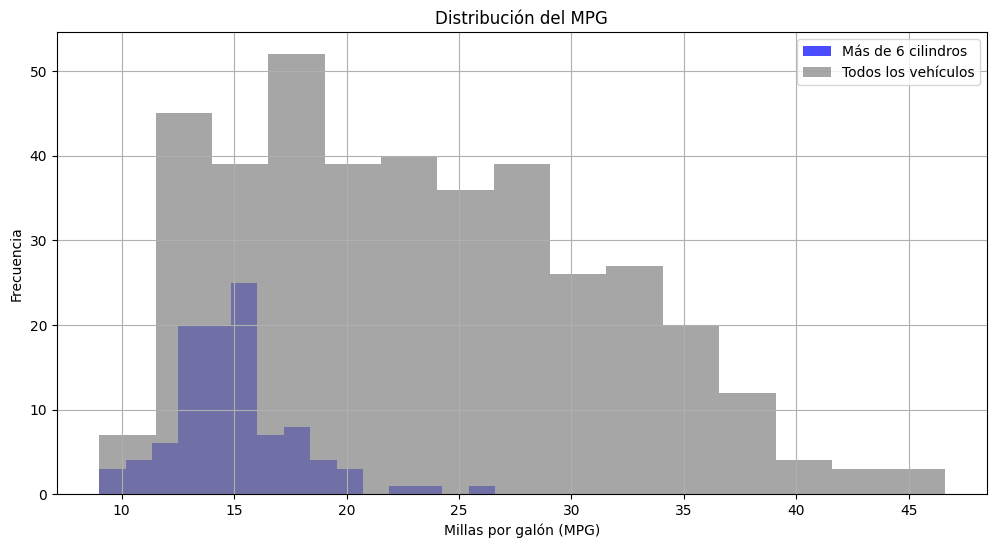

In [37]:
vehicles_more_than_6_cylinders = mpg_data[mpg_data['cylinders'] > 6]

plt.figure(figsize=(12, 6))

plt.hist(vehicles_more_than_6_cylinders['mpg'], bins=15, alpha=0.7, label='Más de 6 cilindros', color='blue')
plt.hist(mpg_data['mpg'], bins=15, alpha=0.7, label='Todos los vehículos', color='gray')

plt.title('Distribución del MPG')
plt.xlabel('Millas por galón (MPG)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

El histograma muestra la distribución del MPG para dos grupos:

Vehículos con más de 6 cilindros (en azul).
Todos los vehículos del dataset (en gris).
Observaciones:

La distribución del MPG para vehículos con más de 6 cilindros está más concentrada en el rango de menor eficiencia (entre 10 y 20 MPG).
La distribución del MPG para todos los vehículos es más amplia, con un mayor rango de valores que incluye vehículos más eficientes en términos de MPG.

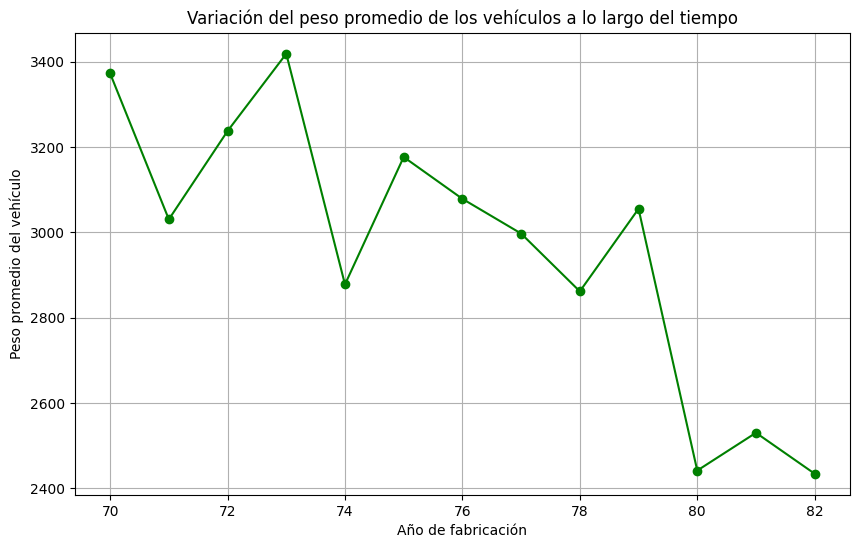

,model_year,weight
0,70,3372.793103
1,71,3030.592593
2,72,3237.714286
3,73,3419.025000
4,74,2878.038462
5,75,3176.800000
6,76,3078.735294
7,77,2997.357143
8,78,2861.805556
9,79,3055.344828


In [38]:
avg_weight_by_year = mpg_data.groupby('model_year')['weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_weight_by_year['model_year'], avg_weight_by_year['weight'], marker='o', linestyle='-', color='green')
plt.title('Variación del peso promedio de los vehículos a lo largo del tiempo')
plt.xlabel('Año de fabricación')
plt.ylabel('Peso promedio del vehículo')
plt.grid(True)
plt.show()

avg_weight_by_year

El gráfico muestra cómo ha variado el peso promedio de los vehículos a lo largo del tiempo. Algunas observaciones clave:

De 1970 a 1973, el peso promedio de los vehículos se mantuvo relativamente alto, alrededor de 3300-3400 libras.
A partir de 1974, se observa una tendencia a la baja en el peso promedio, con una caída significativa en 1980, donde el peso promedio es de aproximadamente 2442 libras.
Durante los primeros años de la década de 1980, el peso promedio se mantiene relativamente bajo en comparación con los años anteriores.
Conclusión: Los vehículos han tendido a ser más livianos a lo largo del tiempo, especialmente a partir de finales de los años setenta, lo que puede estar relacionado con esfuerzos para mejorar la eficiencia de combustible y cumplir con regulaciones ambientales más estrictas.